# Regularisation Methods: LASSO Regression

© Explore Data Science Academy

## Learning Objectives
In this train you will learn how to:

- Understand the difference between L1 and L2 regularisation;
- Walk through the code required to implement a LASSO regression model, and
- Understand the concept of sparsity.

## Outline
Within the various sections of this Train we will:

- Introduce shrinkage methods;
- L1 vs. L2 regularisation (LASSO vs. ridge);
- Implement a LASSO regression model, and
- Compare performance of non-regularised linear model with regularised one.

## Shrinkage Methods

In the train on ridge regression we learned that it is possible to modify and potentially improve the test-set performance of a least squares regression model by reducing the magnitude of some subset of the coefficients $\hat{\beta}$.

The ridge regression process of reducing the magnitude of those coefficients is a type of _shrinkage_ method - we are attempting to shrink the values of those less important coefficients.

In ridge regression, it is possible to shrink a coefficient's value towards zero, but never reaching exactly zero.

## L1 vs. L2 Regularisation

Recall the optimisation expression for ridge regression:

$$\min_{\beta} (RSS + \alpha\sum_{j=1}^pb_j^2)$$

where we attempt to minimise the RSS and some penalty term. This can be rewritten:

$$\min_{\beta} (RSS + \alpha(L2\_norm))$$

where $L2\_norm$ is the sum of the squares of the coefficients.

In LASSO regularisation, we replace the $L2\_norm$ with what is known as the $L1\_norm$: the sum of the _absolute_ values of the coefficients.

This is a relatively recent adaptation of ridge regression which is capable of shrinking predictors to exactly zero - effectively removing them from the model entirely and creating what we call a sparse model (one which uses some subset of all of the available predictors). In this way, LASSO achieves both shrinkage and subset selection.

A LASSO model is fit under the constraint of minimizing the following equation:

$$\sum_{i=1}^n(y_i-(a+\sum_{j=1}^pb_jx_{ij}))^2 + \alpha\sum_{j=1}^p|b_j|$$

which can be rewritten as follows:

$$\min_{\beta} (RSS + \alpha\sum_{j=1}^p|b_j|)$$

or,

$$\min_{\beta} (RSS + \alpha(L1\_norm))$$

## LASSO Regression in `sklearn`

We'll make use of the same dataset that we did in the least squares and ridge regression trains, such that we can effectively compare the results of each method.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Next** we will load our data as a Pandas DataFrame.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Explore-AI/Public-Data/master/Data/regression_sprint/regression_sprint_data_2.csv', index_col=0)
df.head()

,ZAR/USD,Value of Exports (USD),Value of Exports (ZAR),Value of Imports (USD),Value of Imports (ZAR),Total Reserves excl Gold (USD),IMF Reserve Position (USD),Foreign Exchange (USD),Claims on Non-residents (USD),Liabilities to Non-residents (USD),Central Bank Policy Rate,Money Market Rate,Treasury Bill Rate,Savings Rate,Deposit Rate,Lending Rate,Government Bonds,"Financial Market Prices, Equities Index",Producer Price Index,Consumer Price Index
2008M01,7.01,5611.90,39356.82,8105.11,56841.94,29884.51,1.92,29526.78,51547.61,37752.29,11.0,10.64,10.47,4.53,10.83,14.5,8.36,312.97,86.03,85.48
2008M02,7.66,6126.16,46946.33,8159.43,62527.78,30304.31,2.01,29943.04,59702.31,45927.67,11.0,10.66,10.32,5.61,11.00,14.5,8.69,335.09,87.23,85.91
2008M03,7.97,6417.48,51150.89,8010.87,63851.12,30615.42,2.05,30246.54,56448.18,42565.17,11.0,10.69,10.18,5.62,11.04,14.5,9.16,348.84,89.00,87.04
2008M04,7.79,7215.71,56174.34,9112.97,70944.49,30763.42,2.03,30399.21,55534.75,43342.70,11.5,11.00,10.27,5.80,11.28,15.0,9.15,358.47,90.83,87.61
2008M05,7.62,7379.67,56240.45,9090.14,69275.97,30831.43,2.10,30467.81,57682.89,46533.13,11.5,11.20,10.60,6.50,11.39,15.0,9.51,371.98,95.32,88.32


In [3]:
df.shape

(120, 20)

## Preprocessing
We'll be using the same dataset and train/test split as in previous regression trains, and again we will need to standardize the data before it can be used in our LASSO model.

In [4]:
# Separate the features from the response
X = df.drop('ZAR/USD', axis=1)
y = df['ZAR/USD']

In [5]:
# Import the scaling module
from sklearn.preprocessing import StandardScaler

In [6]:
# Create standardization object
scaler = StandardScaler()

In [7]:
# Save standardized features into new variable
X_scaled = scaler.fit_transform(X)

In [8]:
# Import train/test split module
from sklearn.model_selection import train_test_split

In [9]:
# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, 
                                                    y, 
                                                    test_size=0.20,
                                                    random_state=1,
                                                    shuffle=False)

In [10]:
# Import LASSO module
from sklearn.linear_model import Lasso

In [11]:
# Create LASSO model object, setting alpha to 0.01
lasso = Lasso(alpha=0.01)

In [12]:
# Train the LASSO model
lasso.fit(X_train, y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [13]:
# Extract intercept from model
intercept = float(lasso.intercept_)

In [14]:
# Extract coefficient from model
coeff = pd.DataFrame(lasso.coef_, X.columns, columns=['Coefficient'])

In [15]:
# Extract intercept
print("Intercept:", float(intercept))

Intercept: 10.043117246931184


Let's take a look at the actual coefficient values:

In [16]:
coeff

,Coefficient
Value of Exports (USD),-0.542056
Value of Exports (ZAR),1.070156
Value of Imports (USD),-0.830049
Value of Imports (ZAR),1.188285
Total Reserves excl Gold (USD),0.000000
IMF Reserve Position (USD),0.000000
Foreign Exchange (USD),0.065942
Claims on Non-residents (USD),0.000000
Liabilities to Non-residents (USD),0.024812
Central Bank Policy Rate,0.000000


### Interpretation of the intercept and coefficients

We interpret the values of the intercept and coefficients the same way as before:

 - The intercept can be interpreted as the **expected exchange rate when all the features are equal to their means**.
 - Each coefficient is interpreted as the expected change in the response variable given an increase of 1 in the **scaled feature value**.
 
We can see from the list of coefficients above that some of the coefficients have indeed been shrunk to exactly zero.

## Assessment of predictive accuracy
Again, we'll make use of the `sklearn.metrics` library to assess the accuracy of our model. We'll fit the following models as well, in order to compare the LASSO results thoroughly:

- A least squares model using all available predictors;
- A least squares model using the predictors with non-zero coefficients from LASSO;
- A ridge regression model using all available predictors.

In [17]:
# Fit a basic linear model
from sklearn.linear_model import LinearRegression, Ridge

X_subset = df.drop(['ZAR/USD',
                   'Total Reserves excl Gold (USD)',
                   'IMF Reserve Position (USD)',
                   'Claims on Non-residents (USD)',
                   'Central Bank Policy Rate',
                   'Treasury Bill Rate',
                   'Savings Rate',
                   'Deposit Rate',
                   'Lending Rate',
                   'Government Bonds'], axis=1)

X_subset_scaled = scaler.fit_transform(X_subset)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_subset, 
                                                        y, 
                                                        test_size=0.20, 
                                                        random_state=1,
                                                        shuffle=False)

# Least squares using non-zero variables from LASSO
lm_subset = LinearRegression()

# Least squares using all predictors
lm_all = LinearRegression()

# Ridge using all predictors
ridge = Ridge()

lm_subset.fit(X_train2, y_train2)
lm_all.fit(X_train, y_train)
ridge.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [18]:
from sklearn import metrics

In [19]:
# Make training set predictions for each model
train_lm_subset = lm_subset.predict(X_train2)
train_lm_all = lm_all.predict(X_train)
train_ridge = ridge.predict(X_train)
train_lasso = lasso.predict(X_train)

In [20]:
# Make test set predictions for each model
test_lm_subset = lm_subset.predict(X_test2)
test_lm_all = lm_all.predict(X_test)
test_ridge = ridge.predict(X_test)
test_lasso = lasso.predict(X_test)

In [21]:
# Dictionary of results
results_dict = {'Training MSE':
                    {
                        "Least Squares, Subset": metrics.mean_squared_error(y_train2, train_lm_subset),
                        "Least Squares, All": metrics.mean_squared_error(y_train, train_lm_all),
                        "Ridge": metrics.mean_squared_error(y_train, train_ridge),
                        "LASSO": metrics.mean_squared_error(y_train, train_lasso)
                    },
                    'Test MSE':
                    {
                        "Least Squares, Subset": metrics.mean_squared_error(y_test2, test_lm_subset),
                        "Least Squares, All": metrics.mean_squared_error(y_test, test_lm_all),
                        "Ridge": metrics.mean_squared_error(y_test, test_ridge),
                        "LASSO": metrics.mean_squared_error(y_test, test_lasso)
                    }
                }

In [22]:
# Create dataframe from dictionary
results_df = pd.DataFrame(data=results_dict)

In [23]:
# View the results
results_df

,Test MSE,Training MSE
LASSO,0.586468,0.046672
"Least Squares, All",1.683601,0.032654
"Least Squares, Subset",0.700711,0.041667
Ridge,0.669186,0.039696


### Comment
From the results above, we can see that LASSO was able to perform subset selection, while also performing shrinkage. The result is a more generalised model with greater predictive capacity. The least squares model which we trained on the same subset of variables that LASSO retained as non-zero scored a higher MSE on the test set, indicating that the shrinkage that LASSO applied to those remaining variables was effective.

LASSO achieved the best MSE on the test set, followed by ridge regression.

Let's plot our results to end off.

In [24]:
# we want to plot the train and test response variables as a continuous line
train_plot = y_train.append(pd.Series(y_test[0], index=['2016M01']))

We'll plot the the test set versus the three primary methods explored here:

- Least squares using all predictors;
- Ridge using all predictors;
- LASSO using all predictors.

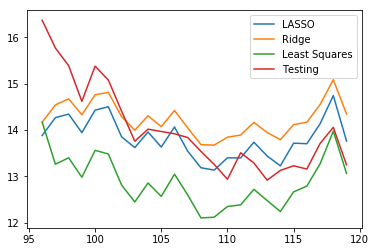

In [25]:
plt.plot(np.arange(96,120), lasso.predict(X_test), label='LASSO')
plt.plot(np.arange(96,120), ridge.predict(X_test), label='Ridge')
plt.plot(np.arange(96,120), lm_all.predict(X_test), label='Least Squares')
plt.plot(np.arange(96,120), y_test, label='Testing')
plt.legend()

plt.show()

## Conclusion

In this train we have seen or been introduced to:

- The purpose of shrinkage methods;
- L1 and L2 regularisation;
- The LASSO regularisation method;
- Comparing LASSO to least squares and ridge regression models.

## Appendix 
Links to additional resources to help with the understanding of concepts presented in the train:

- [Explanation of how LASSO performs variable selection by authors of ISLR](https://youtu.be/A5I1G1MfUmA?t=363)